# Title of Project 

BANK CUSTOMER CHURN MODEL

# Objective

To build a Logistic Regression Model on BANK CUSTOMER CHURN MODEL

# Data Source

https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv

# Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [3]:
data = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')

# Describe Data

In [4]:
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [6]:
data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Data Visualization

In [7]:
data.duplicated('CustomerId').sum()

0

In [8]:
data = data.set_index('CustomerId')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


# Data Preprocessing

In [10]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [11]:
data.replace({'Geography' : {'France':2, 'Germany':1, 'Spain':0}}, inplace=True)

In [12]:
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [13]:
data.replace({'Gender' : {'Male':1, 'Female':0}}, inplace=True)

In [14]:
data['Num Of Products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: Num Of Products, dtype: int64

In [15]:
data.replace({'Num Of Products': {1:0, 2:1, 3:1, 4:1}}, inplace=True)

In [16]:
data['Has Credit Card'].value_counts()

1    7055
0    2945
Name: Has Credit Card, dtype: int64

In [17]:
data['Is Active Member'].value_counts()

1    5151
0    4849
Name: Is Active Member, dtype: int64

In [18]:
data.loc[(data['Balance']==0), 'Churn'].value_counts()

0    3117
1     500
Name: Churn, dtype: int64

In [19]:
data['Zero Balance'] = np.where(data['Balance']>0, 1, 0)

(array([3617.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        6383.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

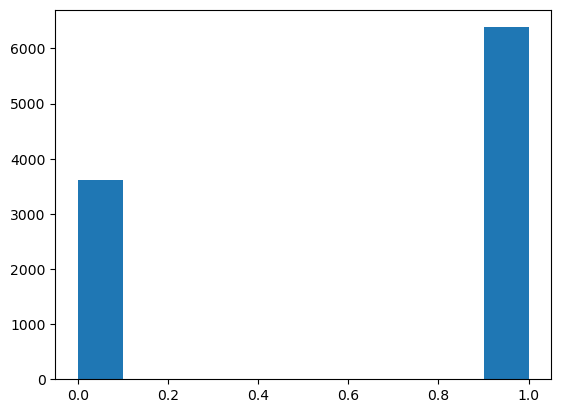

In [20]:
plt.hist(data['Zero Balance'])

In [21]:
data.groupby(['Churn', 'Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

# Define Target Variable (y) and Feature Variables (X)

In [22]:
data.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [27]:
X = data.drop(['Surname', 'Churn'], axis = 1)

In [24]:
y = data['Churn']

In [25]:
x.shape, y.shape

((10000, 11), (10000,))

In [26]:
data['Churn'].value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

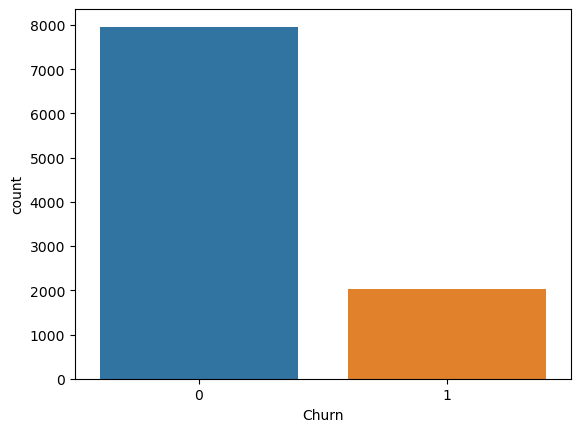

In [28]:
sns.countplot(x = 'Churn', data = data)

In [29]:
# Scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

# Train Test Split

In [30]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(scaled_X, y, train_size = 0.80, stratify = y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8000, 11), (2000, 11), (8000,), (2000,))

# Model Building, predictions and odds ratio

In [31]:
from sklearn.linear_model import LogisticRegression as LR
classifier = LR(class_weight = 'balanced')

In [32]:
classifier.fit(x_train, y_train)
predicted_values = classifier.predict(x_test) # Predicting class
predicted_probabilities = classifier.predict_proba(x_test) # Predicting probabilities

In [33]:
predicted_values

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [34]:
predicted_probabilities, predicted_probabilities.shape

(array([[0.31914886, 0.68085114],
        [0.71156062, 0.28843938],
        [0.37212337, 0.62787663],
        ...,
        [0.57978467, 0.42021533],
        [0.57204343, 0.42795657],
        [0.85173952, 0.14826048]]),
 (2000, 2))

In [35]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, predicted_values)
cf

array([[1117,  476],
       [ 119,  288]], dtype=int64)

# Evaluation Metrics

In [36]:
#Accuracy
classifier.score(x_test, y_test)

0.7025

In [37]:
from sklearn.metrics import precision_score
Precision = precision_score(y_test, predicted_values)
Precision

0.3769633507853403

In [38]:
from sklearn.metrics import recall_score
Recall = recall_score(y_test, predicted_values)
Recall

0.7076167076167076

In [39]:
from sklearn.metrics import f1_score
F1 = f1_score(y_test, predicted_values)
F1

0.4918872758326216

In [41]:
from sklearn.metrics import classification_report
k = classification_report(y_test, predicted_values)
print(k)

              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1593
           1       0.38      0.71      0.49       407

    accuracy                           0.70      2000
   macro avg       0.64      0.70      0.64      2000
weighted avg       0.80      0.70      0.73      2000



# Conclusion

Successfully build the Logistic Regression Model on BANK CUSTOMER CHURN MODEL